In [ ]:
import numpy as np

def averaging(input_array, N):
  input_array = np.array(input_array)
  result_len = len(input_array) // N
  
  #решение с циклом
  # result = []
  # for i in range(result_len):
  #   start_index = i*N
  #   end_index = i*N + N
  #   block = input_array[start_index:end_index]
  #   average = block.mean()
  #   result.append(average)
  # return np.array(result)

  #reshape
  input_array = input_array[:result_len*N]
  return input_array.reshape(-1, N).mean(axis=1)

До сглаживания:


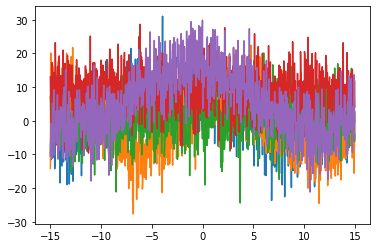

После сглаживания:


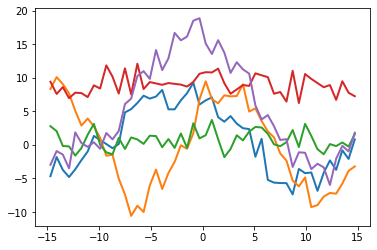

In [ ]:
# проверяем что функция возвращает numpy-массив
assert type(averaging([1, 2, 3], 4)) == np.ndarray
assert type(averaging(np.zeros(3), 4)) == np.ndarray

# принимая пустой список функция возвращает пустой список
assert averaging([], 10).shape == (0,)

# проверяем на коротких массивах
assert list(averaging([1, 2, 3], 4)) == []
assert list(averaging([1, 2, 3], 3)) == [2.0]
assert list(averaging([1, 2, 3], 2)) == [1.5]
assert list(averaging([1, 2, 3, 4], 2)) == [1.5, 3.5]
assert list(averaging([1, 2, 3], 1)) == [1, 2, 3]

# проверяем на длинных массивах
assert list(averaging(np.arange(1000), 1001)) == []
assert list(averaging(np.arange(1000), 1000)) == np.arange(1000).mean()
assert list(averaging(np.arange(1000), 999)) == np.arange(999).mean()

# усредняем заданный массив с разными N
array = [-3, -2, -1, 1, 2, 3] * 100 + [1, 2]
assert list(averaging(array, 6)) == [0] * 100
assert list(averaging(array, 3)) == [-2, 2] * 100
assert list(averaging(array, 2)) == [-2.5, 0, 2.5] * 100 + [1.5]
assert list(averaging(array, 1)) == array
assert list(averaging(array, 12)) == [0] * 50
assert list(averaging(array, 12*50)) == [0]

# ... и проверим ее работу на графике
import matplotlib.pyplot as plt
from numpy.random import rand as rnd
def get_random_graph_with_noise():
  return np.sin(rnd()*5+X*(rnd()+1))*(rnd()/7+1) + np.sin(rnd()*5+X*(rnd()+1)/5)*rnd()*10 + rnd()*10 + np.random.normal(size=len(X))*6

X = np.linspace(-15, 15, 1000)
Ys = [get_random_graph_with_noise()  for _ in range(5)]

print('До сглаживания:')
for Y in Ys:
  plt.plot(X, Y)
plt.show()

print('После сглаживания:')
for Y in Ys:
  plt.plot(averaging(X, 20), averaging(Y, 20), linewidth=2)
plt.show()

In [ ]:
list(averaging([1, 2, 3], 3))

[[1 2 3]]


[1.0, 2.0, 3.0]